Recep Yusuf Bekci 260858044


I selected Frozen Leak from Gym and GridWorld from the book.

# Frozen Lake

In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [0]:
gamma = 1 # Discount factor
cum_reward = []

def random_policy(env):
  'Assigns a random action to every state.'
  return np.random.randint(0, env.nA, size=env.nS)

def expected_reward(env, s, a):
  expected_reward = 0
  for prob, next_s, reward, done in env.P[s][a]:
    expected_reward += prob * reward 
  return expected_reward

def bellman(env, s, value_function):
  V_s = np.zeros(env.nA)
  for a in range(env.nA):
    value = expected_reward(env, s, a)
    for p, next_s, _, _ in env.P[s][a]:
      value += gamma * p * value_function[next_s]
    V_s[a] = value
  return V_s

def evaluate_policy(env, policy, max_iter=1000, delta=1e-6):
  old_value = np.zeros(env.nS)
  for i in range(max_iter):
    new_value = np.zeros(env.nS)
    for s in range(env.nS):
      V_s = bellman(env, s, old_value)
      new_value[s] = V_s[policy[s]]
    if np.max(np.abs(new_value-old_value)) < delta:
      break
    old_value = new_value
  return new_value

def greedy_policy(env, value_function):
  policy = np.zeros(env.nS, dtype=np.int32)
  for s in range(env.nS):
    V_s = bellman(env, s, value_function)
    policy[s] = np.argmax(V_s)
  return policy

def policy_iteration(env, max_iter=100):
  old_policy = random_policy(env)
  cum_rewards = []
  cum_reward = 0
  time_to_solve = []
  cum_rewards_test = []
  cum_reward_test = 0
  time_to_solve_test = []
  for i in range(max_iter):
    value_function = evaluate_policy(env, old_policy)
    new_policy = greedy_policy(env, value_function)
    tot_rew, tot_time = agent(env, new_policy)
    cum_reward += tot_rew
    cum_rewards.append(cum_reward)
    time_to_solve.append(tot_time)   
    if i%2 == 0: # Test plots
      tot_rew, tot_time = agent(env, new_policy)
      cum_reward_test += tot_rew
      cum_rewards_test.append(cum_reward)
      time_to_solve_test.append(tot_time)
    if np.array_equal(new_policy, old_policy):
      break
    old_policy = new_policy
  return old_policy, value_function, cum_rewards, time_to_solve, cum_rewards_test, time_to_solve_test

def value_iteration(env, max_iter=100, delta=1e-6):
  cum_rewards = []
  cum_reward = 0
  time_to_solve = []
  cum_rewards_test = []
  cum_reward_test = 0
  time_to_solve_test = []
  old_value = np.zeros(env.nS)
  policy = np.zeros(env.nS, dtype=np.int32)
  temp_policy = np.zeros(env.nS, dtype=np.int32)
  for i in range(max_iter):
    new_value = np.zeros(env.nS)
    for s in range(env.nS):
      max_a = 0
      V_s = bellman(env, s, old_value)
      for a in range(env.nA):
        if V_s[a]>V_s[max_a]:
          max_a = a
      new_value[s] = V_s[max_a]
      temp_policy[s] = max_a
    tot_rew, tot_time = agent(env, temp_policy)
    cum_reward += tot_rew
    cum_rewards.append(cum_reward)
    time_to_solve.append(tot_time)  
    if i%2 == 0: # For test plots
      tot_rew, tot_time = agent(env, temp_policy)
      cum_reward_test += tot_rew
      cum_rewards_test.append(cum_reward)
      time_to_solve_test.append(tot_time)
    if np.max(np.abs(new_value-old_value)) < delta:
      break
    old_value = new_value
  for s in range(env.nS):
    max_a = 0
    V_s = bellman(env, s, old_value)
    for a in range(env.nA):
        if V_s[a]>V_s[max_a]:
          max_a = a
    policy[s] = max_a
  return policy, new_value, cum_rewards, time_to_solve, cum_rewards_test, time_to_solve_test

### On the Complexities

I have time complexity of Value Iteration as $O(|S|^2\cdot |A|)$, and space complexity of $O(|S|)$ exluding my arrays to keep plotting info. For Policy Iteration $O(|S|^2)$ is the time complexity of policy evaluation $O(|S| \cdot |A|)$ is the time complexity of policy improvement. Space complexities are $O(|S|)$ for both.


In [0]:
def agent(env, policy): 
  # Player for generating plots
  st = env.reset()
  tot_rew = 0
  tot_time = 0
  for k in range(1000):
    a = policy[st]
    n_st, rew, done, _ = env.step(a)
    tot_rew += rew
    tot_time += 1
    if done:
      break
    st = n_st
  env.reset()
  return tot_rew, tot_time
  

## Policy Iteration

In [0]:
old_policy, value_function, cum_rewards, time_to_solve, cum_rewards_test, time_to_solve_test = [], [], [], [], [], []
maxlen_old_policy, maxlen_value_function, maxlen_cum_rewards, maxlen_time_to_solve, maxlen_cum_rewards_test, maxlen_time_to_solve_test = 0,0,0,0,0,0
for i in range(5):
  np.random.seed(seed=44*i)
  env = gym.make('FrozenLake-v0')
  old_policy_, value_function_, cum_rewards_, time_to_solve_, cum_rewards_test_, time_to_solve_test_ = policy_iteration(env)
  old_policy.append(old_policy_)
  value_function.append(value_function_)
  cum_rewards.append(cum_rewards_)
  time_to_solve.append(time_to_solve_)
  cum_rewards_test.append(cum_rewards_test_)
  time_to_solve_test.append(time_to_solve_test_)

In [0]:
import itertools
# Number of episodes differ among seeds. So, I need that code to take the average.

cum_rewards_transpose= [[j for j in i if j is not None] for i in list(itertools.zip_longest(*cum_rewards))]
mean_cum_rewards = [sum(i)/len(i) for i in cum_rewards_transpose]

time_to_solve_transpose= [[j for j in i if j is not None] for i in list(itertools.zip_longest(*time_to_solve))]
mean_time_to_solve = [sum(i)/len(i) for i in time_to_solve_transpose]

cum_rewards_test_transpose= [[j for j in i if j is not None] for i in list(itertools.zip_longest(*cum_rewards))]
mean_cum_rewards_test = [sum(i)/len(i) for i in cum_rewards_test_transpose]

time_to_solve_test_transpose= [[j for j in i if j is not None] for i in list(itertools.zip_longest(*time_to_solve_test))]
mean_time_to_solve_test = [sum(i)/len(i) for i in time_to_solve_test_transpose]

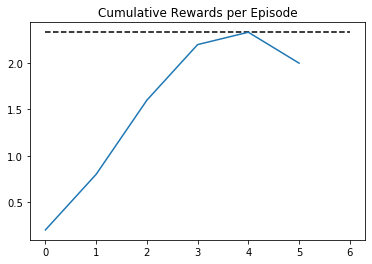

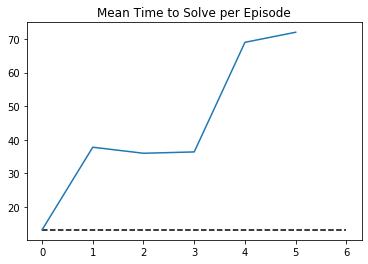

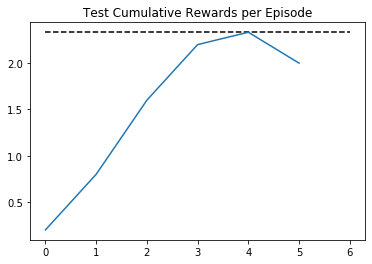

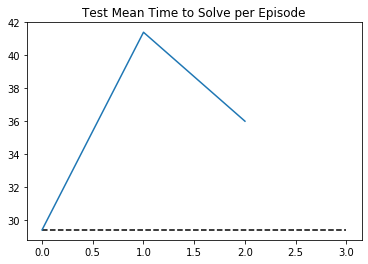

In [0]:
plt.plot(mean_cum_rewards)
plt.title('Cumulative Rewards per Episode')
plt.hlines(max(mean_cum_rewards), xmin=0, xmax=len(mean_cum_rewards), linestyles='--')
plt.show()

plt.plot(mean_time_to_solve)
plt.title('Mean Time to Solve per Episode')
plt.hlines(min(mean_time_to_solve), xmin=0, xmax=len(mean_time_to_solve), linestyles='--')
plt.show()

plt.plot(mean_cum_rewards_test)
plt.title('Test Cumulative Rewards per Episode')
plt.hlines(max(mean_cum_rewards_test), xmin=0, xmax=len(mean_cum_rewards_test), linestyles='--')
plt.show()

plt.plot(mean_time_to_solve_test)
plt.title('Test Mean Time to Solve per Episode')
plt.hlines(min(mean_time_to_solve_test), xmin=0, xmax=len(mean_time_to_solve_test), linestyles='--')
plt.show()

## Value Iteration


In [0]:
old_policy, value_function, cum_rewards, time_to_solve, cum_rewards_test, time_to_solve_test = [], [], [], [], [], []
maxlen_old_policy, maxlen_value_function, maxlen_cum_rewards, maxlen_time_to_solve, maxlen_cum_rewards_test, maxlen_time_to_solve_test = 0,0,0,0,0,0
for i in range(5):
  np.random.seed(seed=44*i)
  env = gym.make('FrozenLake-v0')
  old_policy_, value_function_, cum_rewards_, time_to_solve_, cum_rewards_test_, time_to_solve_test_ = value_iteration(env)
  old_policy.append(old_policy_)
  value_function.append(value_function_)
  cum_rewards.append(cum_rewards_)
  time_to_solve.append(time_to_solve_)
  cum_rewards_test.append(cum_rewards_test_)
  time_to_solve_test.append(time_to_solve_test_)

In [0]:
cum_rewards_transpose= [[j for j in i if j is not None] for i in list(itertools.zip_longest(*cum_rewards))]
mean_cum_rewards = [sum(i)/len(i) for i in cum_rewards_transpose]

time_to_solve_transpose= [[j for j in i if j is not None] for i in list(itertools.zip_longest(*time_to_solve))]
mean_time_to_solve = [sum(i)/len(i) for i in time_to_solve_transpose]

cum_rewards_test_transpose= [[j for j in i if j is not None] for i in list(itertools.zip_longest(*cum_rewards))]
mean_cum_rewards_test = [sum(i)/len(i) for i in cum_rewards_test_transpose]

time_to_solve_test_transpose= [[j for j in i if j is not None] for i in list(itertools.zip_longest(*time_to_solve_test))]
mean_time_to_solve_test = [sum(i)/len(i) for i in time_to_solve_test_transpose]

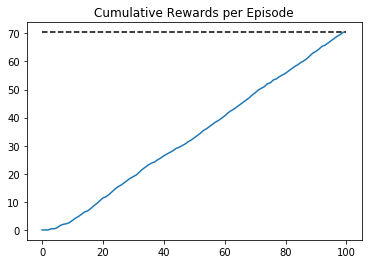

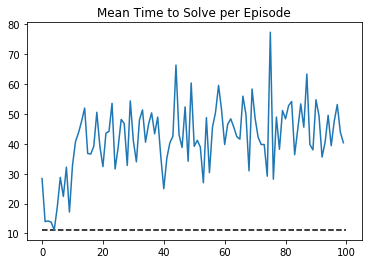

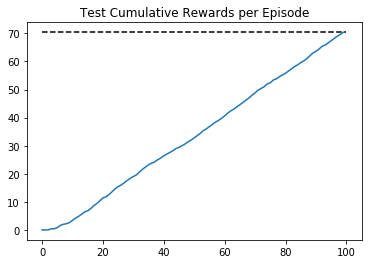

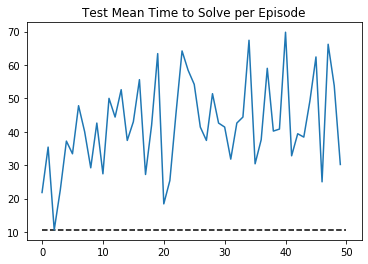

In [0]:
plt.plot(mean_cum_rewards)
plt.title('Cumulative Rewards per Episode')
plt.hlines(max(mean_cum_rewards), xmin=0, xmax=len(mean_cum_rewards), linestyles='--')
plt.show()

plt.plot(mean_time_to_solve)
plt.title('Mean Time to Solve per Episode')
plt.hlines(min(mean_time_to_solve), xmin=0, xmax=len(mean_time_to_solve), linestyles='--')
plt.show()

plt.plot(mean_cum_rewards_test)
plt.title('Test Cumulative Rewards per Episode')
plt.hlines(max(mean_cum_rewards_test), xmin=0, xmax=len(mean_cum_rewards_test), linestyles='--')
plt.show()

plt.plot(mean_time_to_solve_test)
plt.title('Test Mean Time to Solve per Episode')
plt.hlines(min(mean_time_to_solve_test), xmin=0, xmax=len(mean_time_to_solve_test), linestyles='--')
plt.show()

# Grid Word

Page 76 of Sutton & Barto.

In [0]:
class grid():
  def __init__(self):
    self.nA = 4
    self.nS = 15
    self.P = {s : {a : [] for a in range(self.nA)} for s in range(self.nS)}
    self.row, self.col = 0, 1

    for row in range(4):
      for col in range(4):
        s = self.to_s(row, col)
        for a in range(4):
          n_r, n_c = self.inc(row, col, a)
          n_s = self.to_s(n_r, n_c)
          done = False
          if s == 0:
            done = True
          reward = -1
          if s == 0:
            reward = 0
          prob = 1
          self.P[s][a] = [(prob, n_s, reward, done)]

  def to_s(self,row, col):
      if row*4 + col == 15:
        return 0
      else:
        return row*4 + col

  def inc(self, row, col, a):
      if (row==col==0) or (row==col==3):
        pass
      else:
        if a == 3:
            col = max(col-1,0)
        elif a == 2:
            row = min(row+1,4-1)
        elif a == 1:
            col = min(col+1,4-1)
        elif a == 0:
            row = max(row-1,0)
      return row, col

  def reset(self):
    self.row, self.col = 0, 1
    return self.to_s(self.row, self.col)
    
  def step(self, a):
    self.row, self.col = self.inc(self.row, self.col, a)
    new_s = self.to_s(self.row, self.col)
    done = False
    if new_s == 0:
      done = True
    reward = -1
    if new_s == 0:
      reward = 0
    return new_s,reward,done,'prob' 

## Policy Iteration

In [0]:
old_policy, value_function, cum_rewards, time_to_solve, cum_rewards_test, time_to_solve_test = [], [], [], [], [], []
maxlen_old_policy, maxlen_value_function, maxlen_cum_rewards, maxlen_time_to_solve, maxlen_cum_rewards_test, maxlen_time_to_solve_test = 0,0,0,0,0,0
for i in range(5):
  np.random.seed(seed=44*i)
  env = gym.make('FrozenLake-v0')
  old_policy_, value_function_, cum_rewards_, time_to_solve_, cum_rewards_test_, time_to_solve_test_ = policy_iteration(env)
  old_policy.append(old_policy_)
  value_function.append(value_function_)
  cum_rewards.append(cum_rewards_)
  time_to_solve.append(time_to_solve_)
  cum_rewards_test.append(cum_rewards_test_)
  time_to_solve_test.append(time_to_solve_test_)

In [0]:
cum_rewards_transpose= [[j for j in i if j is not None] for i in list(itertools.zip_longest(*cum_rewards))]
mean_cum_rewards = [sum(i)/len(i) for i in cum_rewards_transpose]

time_to_solve_transpose= [[j for j in i if j is not None] for i in list(itertools.zip_longest(*time_to_solve))]
mean_time_to_solve = [sum(i)/len(i) for i in time_to_solve_transpose]

cum_rewards_test_transpose= [[j for j in i if j is not None] for i in list(itertools.zip_longest(*cum_rewards))]
mean_cum_rewards_test = [sum(i)/len(i) for i in cum_rewards_test_transpose]

time_to_solve_test_transpose= [[j for j in i if j is not None] for i in list(itertools.zip_longest(*time_to_solve_test))]
mean_time_to_solve_test = [sum(i)/len(i) for i in time_to_solve_test_transpose]

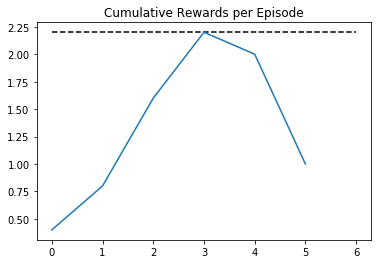

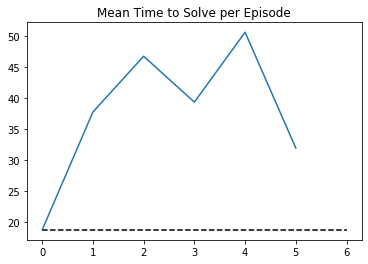

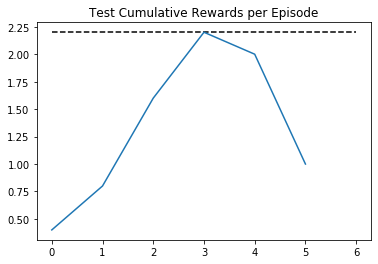

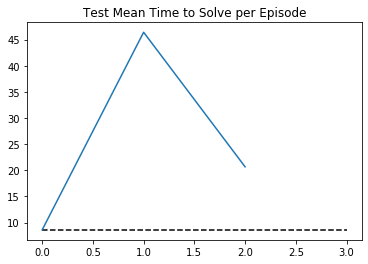

In [0]:
plt.plot(mean_cum_rewards)
plt.title('Cumulative Rewards per Episode')
plt.hlines(max(mean_cum_rewards), xmin=0, xmax=len(mean_cum_rewards), linestyles='--')
plt.show()

plt.plot(mean_time_to_solve)
plt.title('Mean Time to Solve per Episode')
plt.hlines(min(mean_time_to_solve), xmin=0, xmax=len(mean_time_to_solve), linestyles='--')
plt.show()

plt.plot(mean_cum_rewards_test)
plt.title('Test Cumulative Rewards per Episode')
plt.hlines(max(mean_cum_rewards_test), xmin=0, xmax=len(mean_cum_rewards_test), linestyles='--')
plt.show()

plt.plot(mean_time_to_solve_test)
plt.title('Test Mean Time to Solve per Episode')
plt.hlines(min(mean_time_to_solve_test), xmin=0, xmax=len(mean_time_to_solve_test), linestyles='--')
plt.show()

## Value Iteration

In [0]:
old_policy, value_function, cum_rewards, time_to_solve, cum_rewards_test, time_to_solve_test = [], [], [], [], [], []
maxlen_old_policy, maxlen_value_function, maxlen_cum_rewards, maxlen_time_to_solve, maxlen_cum_rewards_test, maxlen_time_to_solve_test = 0,0,0,0,0,0
for i in range(5):
  np.random.seed(seed=44*i)
  env = gym.make('FrozenLake-v0')
  old_policy_, value_function_, cum_rewards_, time_to_solve_, cum_rewards_test_, time_to_solve_test_ = value_iteration(env)
  old_policy.append(old_policy_)
  value_function.append(value_function_)
  cum_rewards.append(cum_rewards_)
  time_to_solve.append(time_to_solve_)
  cum_rewards_test.append(cum_rewards_test_)
  time_to_solve_test.append(time_to_solve_test_)

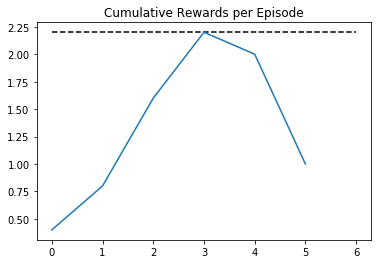

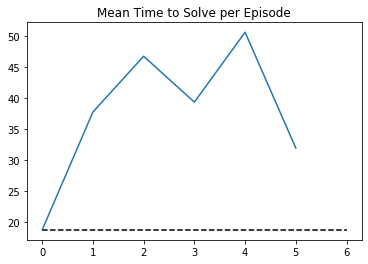

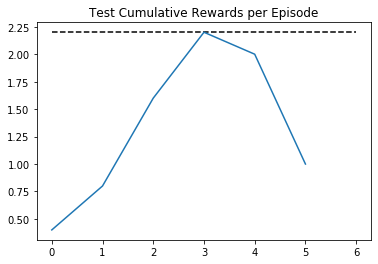

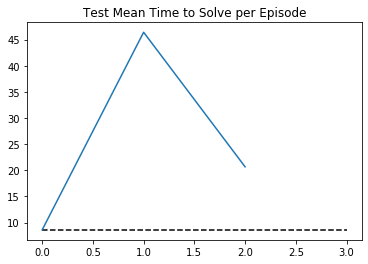

In [0]:
plt.plot(mean_cum_rewards)
plt.title('Cumulative Rewards per Episode')
plt.hlines(max(mean_cum_rewards), xmin=0, xmax=len(mean_cum_rewards), linestyles='--')
plt.show()

plt.plot(mean_time_to_solve)
plt.title('Mean Time to Solve per Episode')
plt.hlines(min(mean_time_to_solve), xmin=0, xmax=len(mean_time_to_solve), linestyles='--')
plt.show()

plt.plot(mean_cum_rewards_test)
plt.title('Test Cumulative Rewards per Episode')
plt.hlines(max(mean_cum_rewards_test), xmin=0, xmax=len(mean_cum_rewards_test), linestyles='--')
plt.show()

plt.plot(mean_time_to_solve_test)
plt.title('Test Mean Time to Solve per Episode')
plt.hlines(min(mean_time_to_solve_test), xmin=0, xmax=len(mean_time_to_solve_test), linestyles='--')
plt.show()

## Observations

Both methods worked pretty well in both tasks. They converged to the optimal policy except value iteration for Frozen Lake. Therefore test plots are not informative in my case. I couldn't see any advantages of one algorithm to the other. However, before implementing Grid World, I tried to implement Gambler's problem in the book(in the value iteraton chapter). It was very nice for value iteration and I got the same value functions and plots as given in the book. On the other hand, as mentioned in the book that game has numerous alternative optimal policies and in that case my policy iteration did not work. All in all, I count that question as a successful one and having the same policies and values for both algorithms it sounds mistake proof.


